In [3]:
import tensorflow as tf


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("heart.csv")

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
import seaborn as sns
index = [2]
index[0] = 6
df = np.loadtxt('heart.csv', delimiter=',', skiprows=1, usecols = index, dtype = "str")
pd.Series(df).value_counts()

    

Normal    552
LVH       188
ST        178
dtype: int64

In [51]:
from util import load_data, add_theta_0
from sklearn.preprocessing import StandardScaler
x, y = load_data("heart.csv", np.array(['Age', "Sex", "ChestPainType", 'RestingBP', "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", 'Oldpeak', 'ST_Slope']), label='HeartDisease', intialize_theta_0=False, scale=False, type = "str")
x

x = np.loadtxt("heart.csv", usecols = range(11), skiprows = 1, dtype = "str", delimiter=',')
y = np.loadtxt("heart.csv", usecols = range(11, 12), skiprows = 1, dtype = "str", delimiter=',')

m, n = x.shape
d0 = {"M": 1, "F": 0}
d1 = {"ASY": 1, "NAP": 2, "ATA": 3, "TA": 4}
d2 = {"Normal": 1, "ST": 2, "LVH": 3}
d3 = {"Y": 1, "N": 0}
d4 = {"Up": 1, "Flat": 2, "Down": 3}
for i in range(m):
    x[i, 1] = d0[x[i, 1]]
    x[i, 2] = d1[x[i, 2]]
    x[i, 6] = d2[x[i, 6]]
    x[i, 8] = d3[x[i, 8]]
    x[i, 10] = d4[x[i, 10]]
    
x = x.astype(float)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x = add_theta_0(x)
x
y = y.astype(float)

x.shape


(918, 12)

Text(0, 0.5, 'x2')

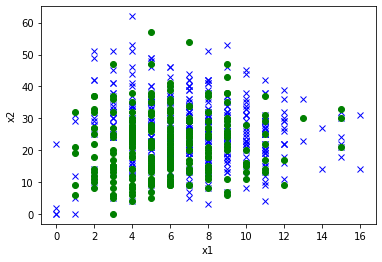

In [221]:
plt.figure()
plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

# Add labels and save to disk
plt.xlabel('x1')
plt.ylabel('x2')

In [56]:
from sklearn.preprocessing import StandardScaler

n_epoch = 100000
learning_rate = 0.1
m, n = x.shape

X = tf.constant(x, dtype = tf.float32, name = "Scaled Features")
y = y.reshape(-1, 1)
theta = tf.Variable((tf.random.uniform([12, 1], -1.0, 1.0)), name = "theta")
#theta = tf.Variable(([[0.], [0.], [0.]]), name = "theta")


In [57]:
y = y.reshape(-1, 1)
for epoch in range(n_epoch):
   y_pred = 1 + tf.math.exp(- X @ theta)
   #sum = 0
   #for i in range(m):
       #sum += int(y[i][0] == int(pred[i][0]))
   error = y_pred - y

   mse = tf.reduce_mean(tf.square(error), name = "mse")
   #gradients = 1/m * tf.matmul(tf.transpose(X), error)
   theta_old = theta
   #theta = theta - learning_rate * gradients
   theta = theta + learning_rate /  (epoch / 1000 + 1) * tf.transpose(X) @ (y - 1 / (1 + tf.math.exp(- X @ theta))) / m
  
   if (np.linalg.norm(theta_old - theta) < 0.00001):
        print(theta)
        print(epoch)
        pred = 1 / (1 + tf.math.exp(- X @ theta))
        pred = pred > 0.5
        sum = 0
        for i in range(m):
            sum += int(y[i][0] == int(pred[i][0]))
        print("Epoch: ", epoch, "correct rate: ", sum / m)
        break
   if epoch % 100 == 0:
        #print("1", learning_rate * gradients)
        #print("2", learning_rate * tf.transpose(X) @ (y_train - X @ theta) / m)
        pred = 1 / (1 + tf.math.exp(- X @ theta))
        pred = pred > 0.5
        sum = 0
        for i in range(m):
            sum += int(y[i][0] == int(pred[i][0]))
        print("Epoch: ", epoch, "correct rate: ", sum / m)
        
        

Epoch:  0 correct rate:  0.6296296296296297
Epoch:  100 correct rate:  0.8431372549019608
Epoch:  200 correct rate:  0.855119825708061
Epoch:  300 correct rate:  0.8540305010893247
Epoch:  400 correct rate:  0.8562091503267973
Epoch:  500 correct rate:  0.8562091503267973
Epoch:  600 correct rate:  0.8572984749455338
Epoch:  700 correct rate:  0.8562091503267973
Epoch:  800 correct rate:  0.8562091503267973
Epoch:  900 correct rate:  0.8572984749455338
Epoch:  1000 correct rate:  0.8583877995642701
Epoch:  1100 correct rate:  0.8583877995642701
Epoch:  1200 correct rate:  0.8583877995642701
Epoch:  1300 correct rate:  0.8583877995642701
Epoch:  1400 correct rate:  0.8583877995642701
tf.Tensor(
[[ 0.41664064]
 [ 0.12698019]
 [ 0.52986944]
 [-0.6776897 ]
 [ 0.08501651]
 [-0.3484255 ]
 [ 0.45314088]
 [ 0.06003139]
 [-0.201661  ]
 [ 0.5203226 ]
 [ 0.36777642]
 [ 1.0013216 ]], shape=(12, 1), dtype=float32)
1441
Epoch:  1441 correct rate:  0.8572984749455338


In [58]:
pred = 1 / (1 + tf.math.exp(- X @ theta))
pred = pred > 0.5

<tf.Tensor: shape=(918, 1), dtype=bool, numpy=
array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ 

In [59]:
sum = 0
for i in range(m):
    sum += int(y[i][0] == int(pred[i][0]))
sum / m

In [52]:
from sklearn.linear_model import LogisticRegression

y = y.reshape(-1,)
log_reg = LogisticRegression()
log_reg.fit(x, y)
threshold = 0.5


In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x, y, cv=20)
scores

array([0.86956522, 0.76086957, 0.91304348, 0.86956522, 0.95652174,
       0.86956522, 0.93478261, 0.91304348, 0.93478261, 0.7173913 ,
       0.84782609, 0.7826087 , 0.82608696, 0.95652174, 0.82608696,
       0.76086957, 0.7826087 , 0.73913043, 0.8       , 0.8       ])

In [54]:
score = log_reg.score(x, y)
print("Test Accuracy Score", score)

Test Accuracy Score 0.8562091503267973


In [55]:
np.mean(scores)

0.8430434782608696